In [1]:
from icevision.all import *
from icevision.models.checkpoint import *
from PIL import Image

# Load model
checkpoint_path = "./models/model_checkpoint.pth"
checkpoint_and_model = model_from_checkpoint(checkpoint_path)
model = checkpoint_and_model["model"]
model_type = checkpoint_and_model["model_type"]
class_map = checkpoint_and_model["class_map"]

# Transforms
img_size = checkpoint_and_model["img_size"]
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /home/dnth/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17


load checkpoint from local path: ./models/model_checkpoint.pth


/home/dnth/anaconda3/envs/algae-blog/lib/python3.8/site-packages/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  warnings.warn(
2022-04-09 11:53:18,746 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2022-04-09 11:53:18,746 - mmcv - INFO - load model from: torchvision://resnet50
2022-04-09 11:53:18,747 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2022-04-09 11:53:18,814 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-04-09 11:53:18,835 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-04-09 11:53:18,854 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'vfnet_cls'

In [2]:
img = Image.open('data/not_labeled/IMG_20191203_164256.jpg')
pred_dict = model_type.end2end_detect(img, valid_tfms, model, 
                                      class_map=class_map, 
                                      detection_threshold=0.5,
                                      display_label=True, 
                                      display_bbox=True, 
                                      return_img=True, 
                                      font_size=50, 
                                      label_color="#FF59D6")

/home/dnth/anaconda3/envs/algae-blog/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
# Number of bboxes
len(pred_dict['detection']['bboxes'])

29

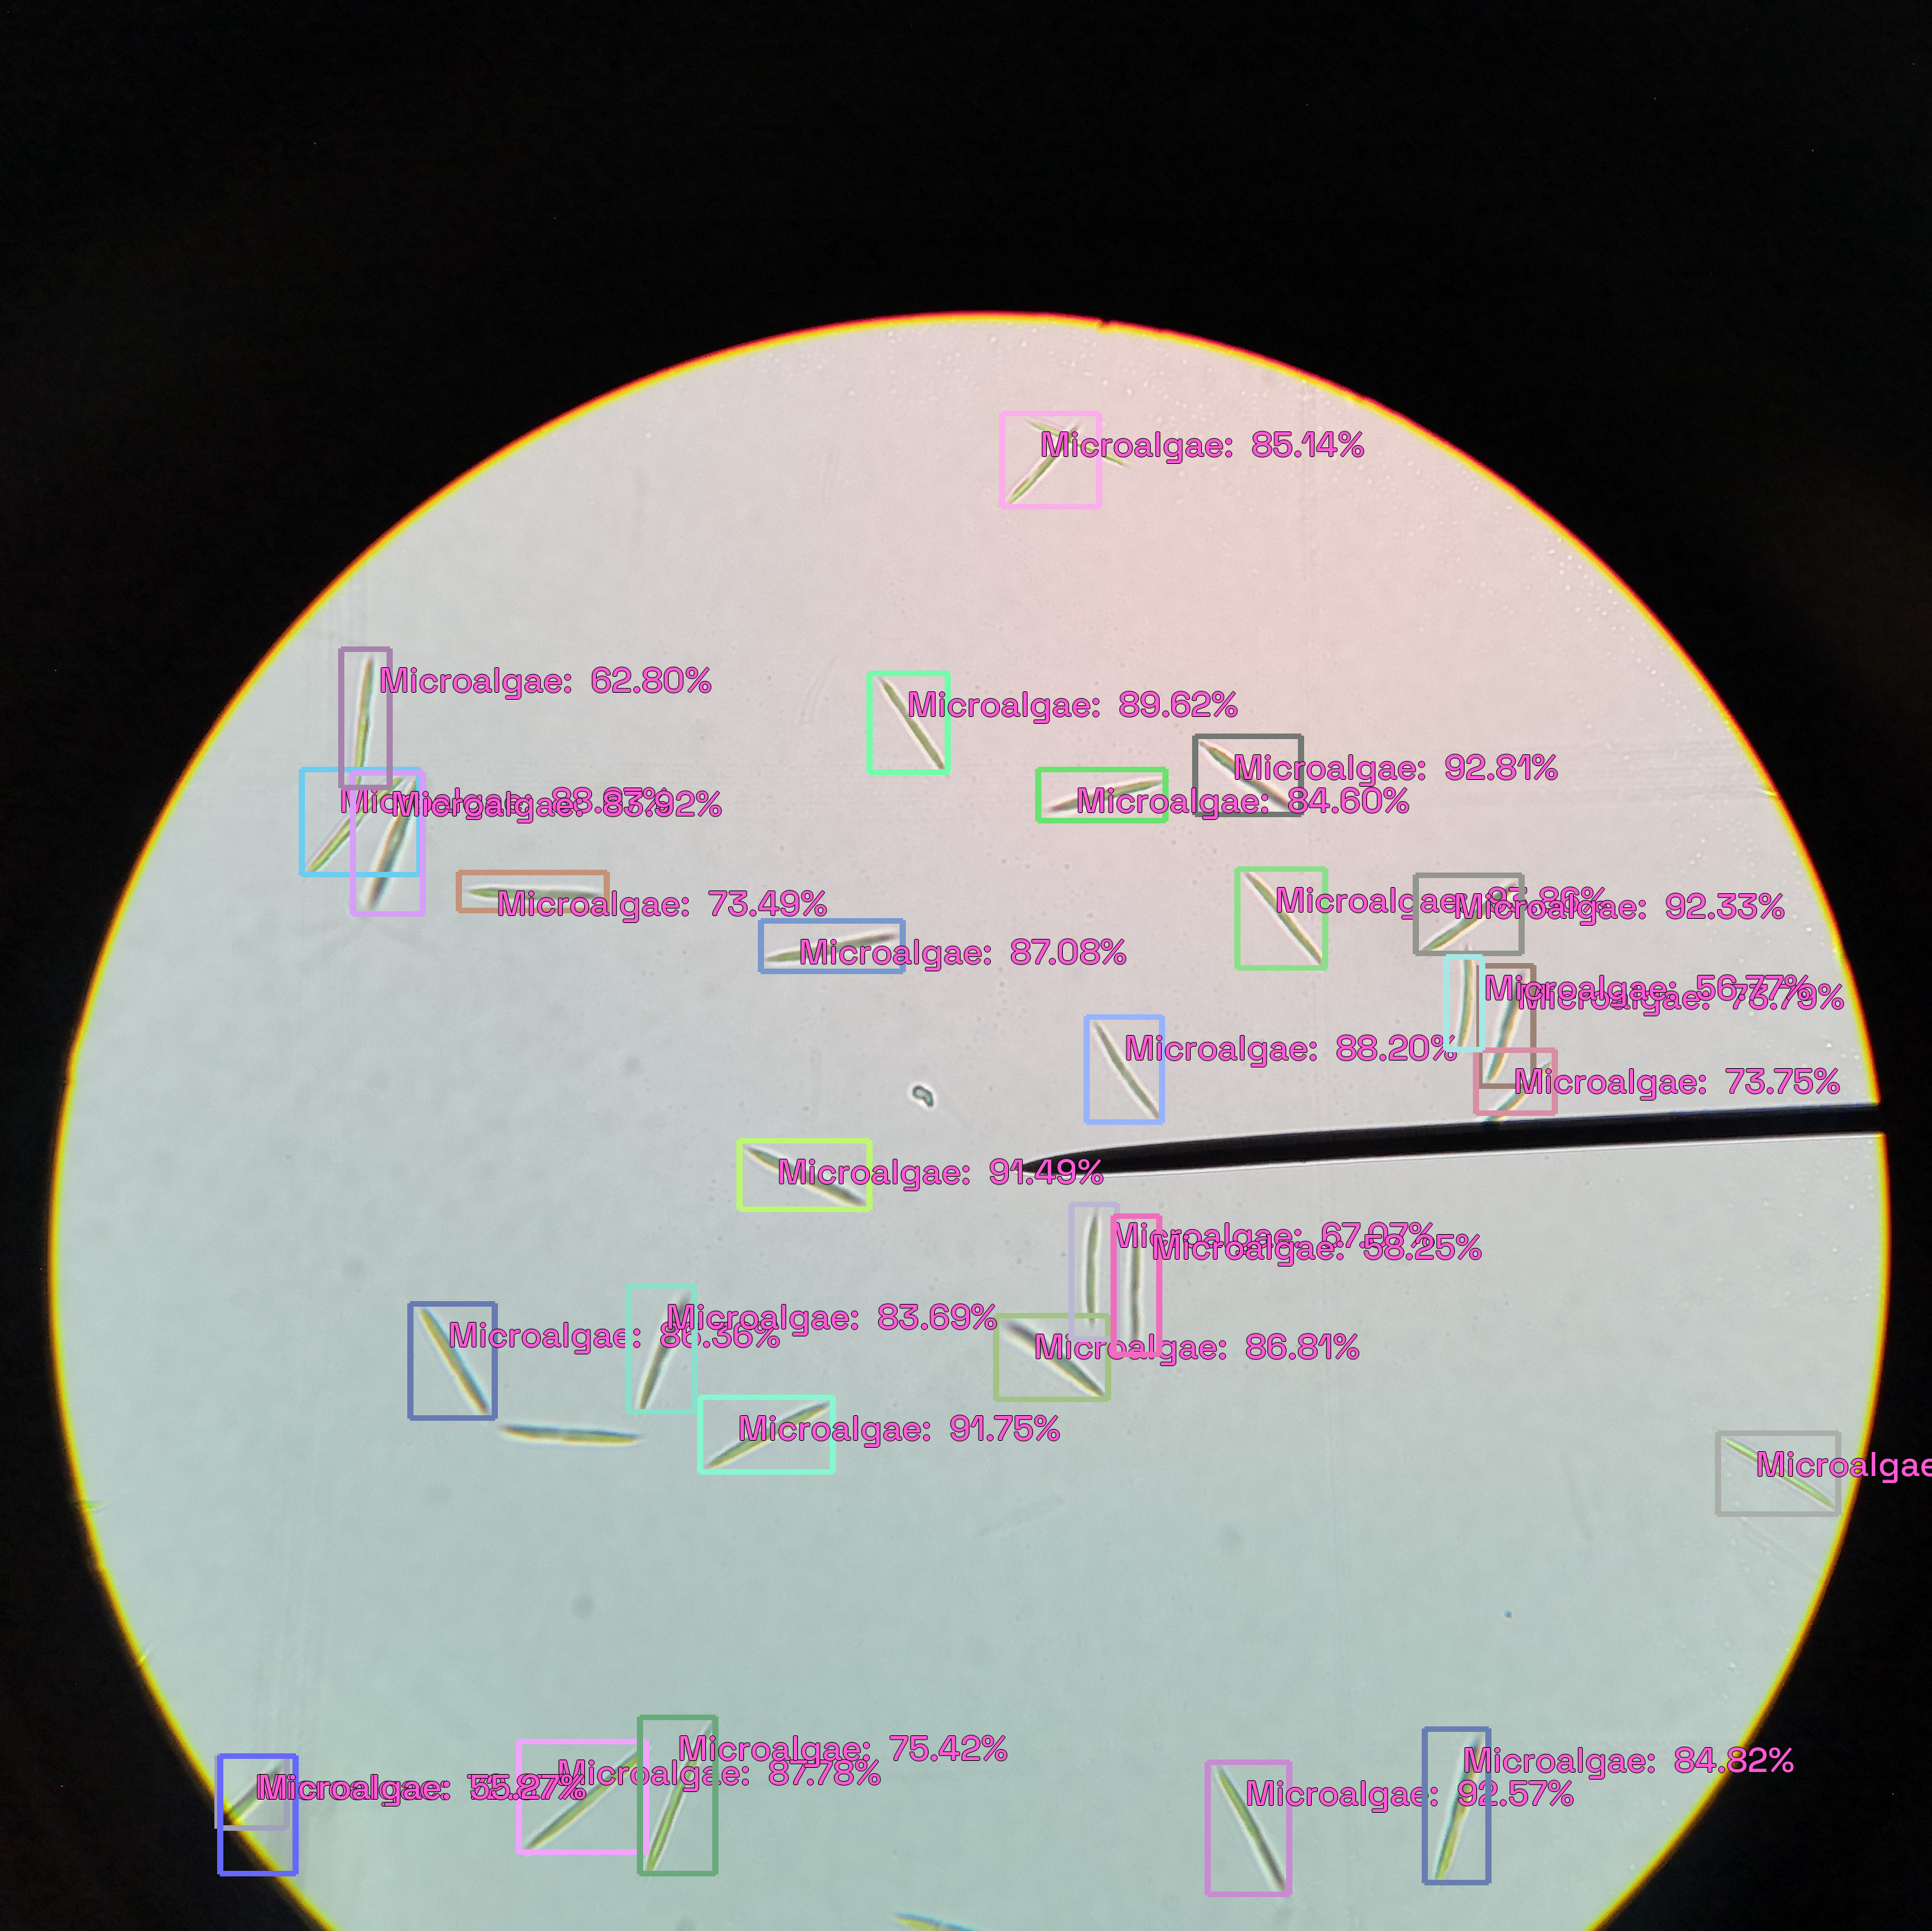

In [4]:
pred_dict["img"]

In [5]:
pred_dict["img"].save("inference.png")